# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url+city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url['coord']['lat']
        city_lng = city_url['coord']['lon']
        city_max_temp = city_url['main']['temp_max']
        city_humidity = city_url['main']['humidity']
        city_clouds = city_url['clouds']['all']
        city_wind = city_url['wind']['speed']
        city_country = city_url['sys']['country']
        city_date = city_url['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bairnsdale
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | melur
Processing Record 5 of Set 1 | tuensang
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | lecheng
Processing Record 9 of Set 1 | selebi-phikwe
Processing Record 10 of Set 1 | hadibu
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | dzuunharaa
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | kadhan
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | zhanibek
Processing Record 19 of Set 1 | camana
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set

Processing Record 38 of Set 4 | cidreira
Processing Record 39 of Set 4 | peravurani
Processing Record 40 of Set 4 | dhaulpur
Processing Record 41 of Set 4 | lakatoro
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | conde
Processing Record 44 of Set 4 | imeni morozova
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | essaouira
Processing Record 47 of Set 4 | jayapura
Processing Record 48 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 49 of Set 4 | uturoa
Processing Record 0 of Set 5 | gizo
Processing Record 1 of Set 5 | severoural'sk
Processing Record 2 of Set 5 | strelka
Processing Record 3 of Set 5 | kasama
Processing Record 4 of Set 5 | necochea
Processing Record 5 of Set 5 | tsiombe
Processing Record 6 of Set 5 | wailua homesteads
Processing Record 7 of Set 5 | spas-demensk
Processing Record 8 of Set 5 | brookings
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | yilan
Processing Record 11 of Se

Processing Record 25 of Set 8 | belmonte
Processing Record 26 of Set 8 | diamantino
Processing Record 27 of Set 8 | balabac
Processing Record 28 of Set 8 | naantali
Processing Record 29 of Set 8 | lethbridge
Processing Record 30 of Set 8 | nadvoitsy
Processing Record 31 of Set 8 | panciu
Processing Record 32 of Set 8 | artesia
Processing Record 33 of Set 8 | shingu
Processing Record 34 of Set 8 | murzuq
Processing Record 35 of Set 8 | lacombe
Processing Record 36 of Set 8 | arab
Processing Record 37 of Set 8 | zambezi
Processing Record 38 of Set 8 | trujillo
Processing Record 39 of Set 8 | afif
Processing Record 40 of Set 8 | mount pearl
Processing Record 41 of Set 8 | mount isa
Processing Record 42 of Set 8 | atambua
Processing Record 43 of Set 8 | tanumah
Processing Record 44 of Set 8 | kailua-kona
Processing Record 45 of Set 8 | arkhangel'sk
Processing Record 46 of Set 8 | pemangkat
Processing Record 47 of Set 8 | chinde
Processing Record 48 of Set 8 | fort st. john
Processing Recor

Processing Record 14 of Set 12 | bamnet narong
Processing Record 15 of Set 12 | igreja
Processing Record 16 of Set 12 | thames
Processing Record 17 of Set 12 | kismayo
Processing Record 18 of Set 12 | emerald
Processing Record 19 of Set 12 | zwedru
Processing Record 20 of Set 12 | ambalavao
Processing Record 21 of Set 12 | chany
Processing Record 22 of Set 12 | dul'durga
Processing Record 23 of Set 12 | flying fish cove
Processing Record 24 of Set 12 | kertih
Processing Record 25 of Set 12 | attapeu
Processing Record 26 of Set 12 | buka
Processing Record 27 of Set 12 | mersa matruh
Processing Record 28 of Set 12 | taoudenni
Processing Record 29 of Set 12 | vail
Processing Record 30 of Set 12 | kitgum
Processing Record 31 of Set 12 | alofi
Processing Record 32 of Set 12 | esplanada
Processing Record 33 of Set 12 | malakal
Processing Record 34 of Set 12 | dhuusamarreeb
Processing Record 35 of Set 12 | bereket
Processing Record 36 of Set 12 | port douglas
Processing Record 37 of Set 12 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bairnsdale,-37.8333,147.6167,19.47,85,100,0.44,AU,1709154275
1,vilyuchinsk,52.9306,158.4028,-4.85,91,100,2.90,RU,1709154266
2,tiksi,71.6872,128.8694,-19.00,85,29,8.35,RU,1709154276
3,melur,10.0500,78.3333,23.00,83,100,2.99,IN,1709154276
4,tuensang,26.2833,94.8333,12.26,76,34,0.87,IN,1709154277


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("outputdata/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("outputdata/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bairnsdale,-37.8333,147.6167,19.47,85,100,0.44,AU,1709154275
1,vilyuchinsk,52.9306,158.4028,-4.85,91,100,2.90,RU,1709154266
2,tiksi,71.6872,128.8694,-19.00,85,29,8.35,RU,1709154276
3,melur,10.0500,78.3333,23.00,83,100,2.99,IN,1709154276
4,tuensang,26.2833,94.8333,12.26,76,34,0.87,IN,1709154277


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

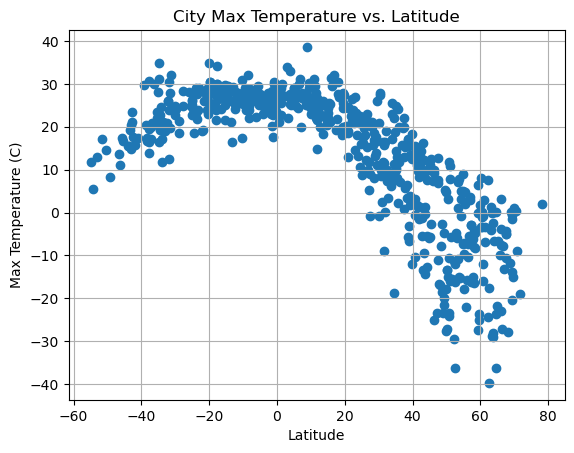

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("outputdata/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

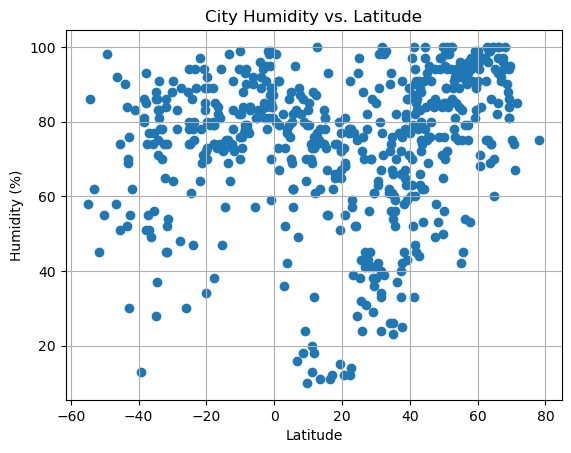

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("outputdata/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

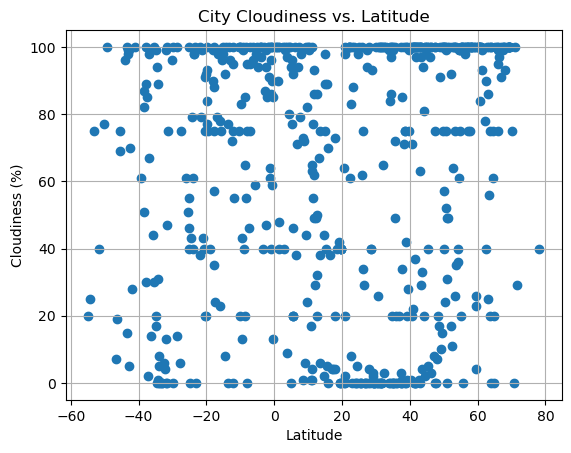

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("outputdata/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

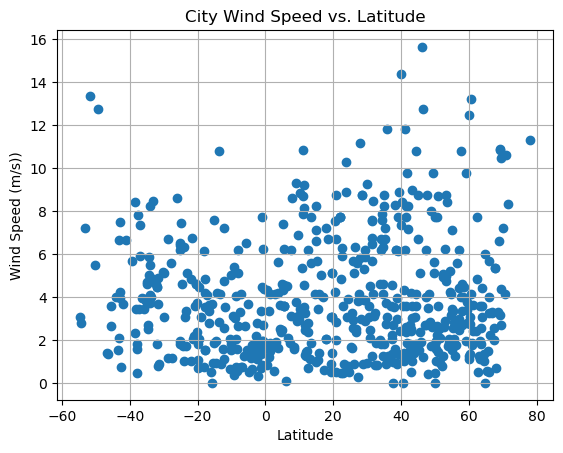

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("outputdata/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vilyuchinsk,52.9306,158.4028,-4.85,91,100,2.90,RU,1709154266
2,tiksi,71.6872,128.8694,-19.00,85,29,8.35,RU,1709154276
3,melur,10.0500,78.3333,23.00,83,100,2.99,IN,1709154276
4,tuensang,26.2833,94.8333,12.26,76,34,0.87,IN,1709154277
7,lecheng,25.1238,113.3254,8.76,97,100,1.68,CN,1709154278


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bairnsdale,-37.8333,147.6167,19.47,85,100,0.44,AU,1709154275
5,waitangi,-43.9535,-176.5597,15.46,90,96,4.02,NZ,1709154277
6,port mathurin,-19.6833,63.4167,25.55,70,100,4.45,MU,1709154073
8,selebi-phikwe,-21.9790,27.8498,19.01,64,38,4.82,BW,1709154278
12,grytviken,-54.2811,-36.5092,5.56,86,25,2.77,GS,1709154269


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.6685768246485931


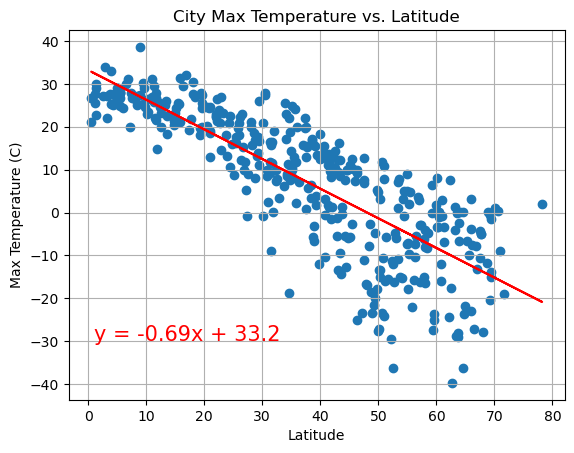

In [28]:
# Linear regression on Northern Hemisphere
#Define x and y values 
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-30),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

R squared: 0.31812744378611435


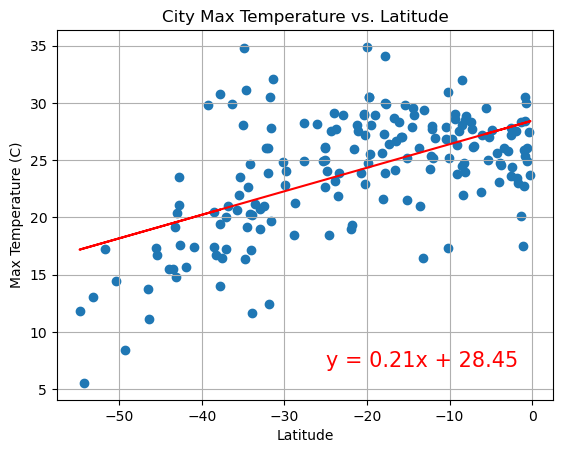

In [29]:
# Linear regression on Southern Hemisphere
#Define x and y values 
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** In the northern hemisphere there is a negative correlation between max temperature and latitude. In the southern hemisphere there is a positive correlation between these two variables. 

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.15289151234016374


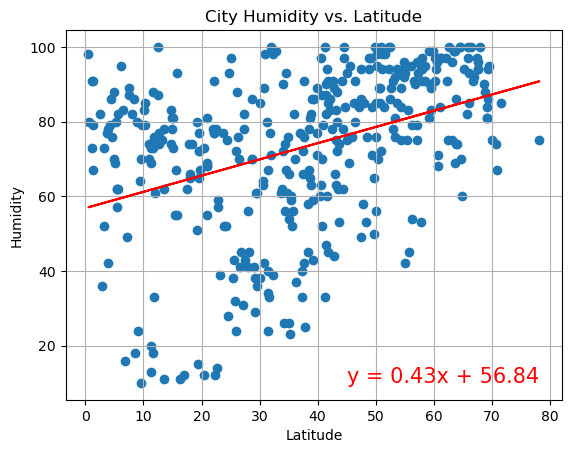

In [31]:
# Northern Hemisphere

#Define x and y values 
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

R squared: 0.1482705585649626


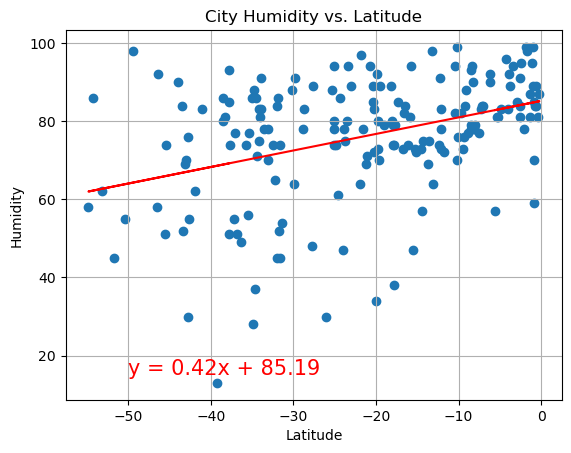

In [33]:
# Southern Hemisphere

#Define x and y values 
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** Both the northern and southern hemispheres have a positive correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.04191213095342578


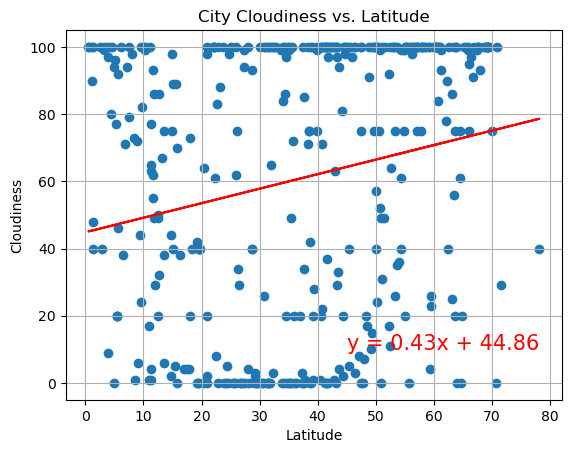

In [34]:
# Northern Hemisphere

#Define x and y values 
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

R squared: 0.08579314465260406


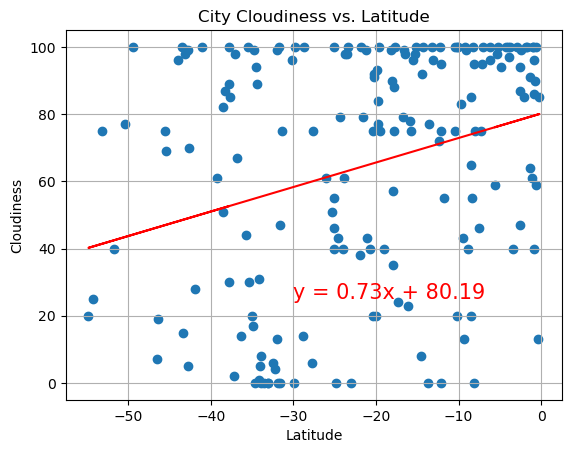

In [35]:
# Southern Hemisphere
#Define x and y values 
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** Both the northern and southern hemispheres have a positive correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0007819197089028945


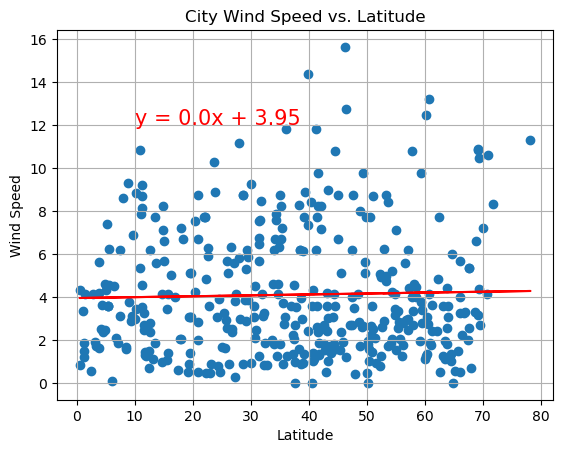

In [36]:
# Northern Hemisphere

#Define x and y values 
x_values =northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

R squared: 0.1299762572034116


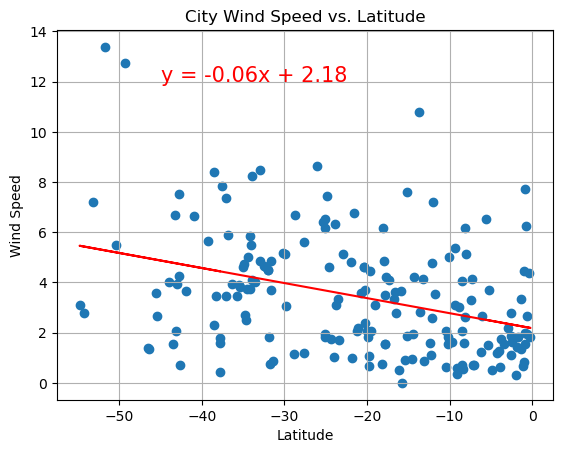

In [38]:
# Southern Hemisphere

#Define x and y values 
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Run linear regression function
regress_values, line_eq, rvalue = linear_regression(x_values, y_values)

#Plot scatter
plt.scatter(x_values, y_values, marker="o")

#Plot regression line 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,12),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#print r squared value 
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** There appears to be no correlation between wind speed and latitude in the northern hemisphere but a slight negative correlation in the southern hemisphere.